In [3]:
import pandas as pd
import numpy as np
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from IPython.display import Image

### import data

In [4]:
data = pd.read_csv('../../Data/WeatherOutagesAllJerry.csv')

In [5]:
data = data.dropna(how = 'all')

In [6]:
data.head(5)

,Date,Total_outages,Equipment,Trees,Animals,Lightning,Day_length_hr,Max_temp_F,Avg_Temp_F,Min_temp_F,...,Avg_windspeed_mph,Max_windgust_mph,Precipitation_in,Events,Event_fog,Event_rain,Event_snow,Event_thunderstorm,Event_Hail,Event_Tornado
0,9/11/00,0.0,0.0,0.0,0.0,0.0,12.783333,66.0,58.0,50.0,...,2.0,9.0,0.01,Fog,1.0,0.0,0.0,0.0,0.0,0.0
1,9/12/00,2.0,1.0,0.0,1.0,0.0,12.716667,75.0,62.0,52.0,...,4.0,9.0,0.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,9/13/00,1.0,1.0,0.0,0.0,0.0,12.666667,77.0,64.0,54.0,...,7.0,25.0,0.00,Fog,1.0,0.0,0.0,0.0,0.0,0.0
3,9/14/00,0.0,0.0,0.0,0.0,0.0,12.616667,84.0,71.0,60.0,...,12.0,9.0,0.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,9/15/00,1.0,1.0,0.0,0.0,0.0,12.550000,73.0,66.0,59.0,...,5.0,9.0,0.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
np.shape(data)

(5664, 27)

In [8]:
#data = data.fillna(0)
#data = data.round(4)

In [9]:
train,test=train_test_split(data,test_size=0.1,random_state=567)

In [17]:
x_train = train.iloc[:,6:19].join(train.iloc[:,21:])
y_train = train.iloc[:,1]

x_test = test.iloc[:,6:19].join(test.iloc[:,21:])
y_test = test.iloc[:,1]

In [18]:
# data normalization
x_train = preprocessing.normalize(x_train)
#y_train = preprocessing.normalize(y_train)

x_test = preprocessing.normalize(x_test)
#y_test = preprocessing.normalize(y_test)

In [19]:
x_train.size

96843

In [20]:
y_test.size

567

### Decision Tree 

In [40]:
predictor = DecisionTreeRegressor(criterion='mse',max_leaf_nodes=6)

In [41]:
clf = predictor.fit(x_train,y_train)

In [42]:
y_trainpred = predictor.predict(x_train)
y_pred = predictor.predict(x_test)

In [43]:
score = mean_squared_error(y_test, y_pred)
print("Train error",mean_squared_error(y_train,y_trainpred))
print("Test error",mean_squared_error(y_test,y_pred))

Train error 3.36246724318
Test error 3.71908873168


In [44]:
tree_dot = export_graphviz(clf,out_file = 'tree_all_normalized.dot')

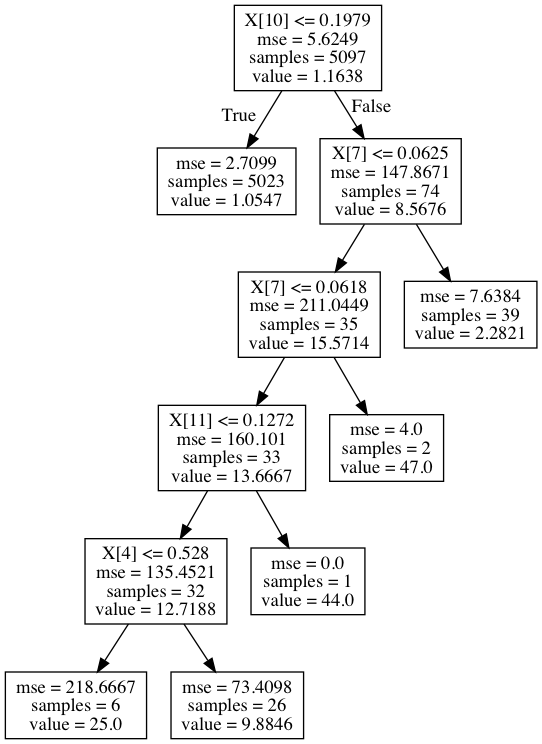

In [45]:
graph = pydotplus.graphviz.graph_from_dot_file('tree_all_normalized.dot')
Image(graph.create_png())

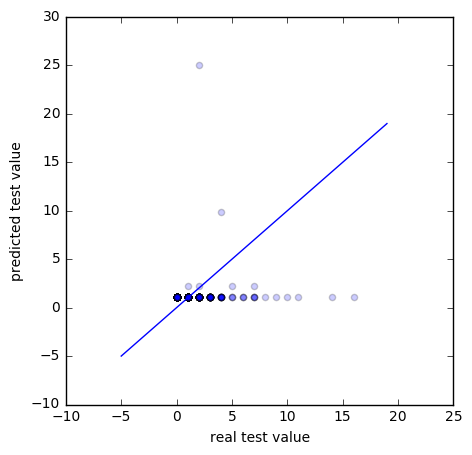

In [46]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred,alpha=0.2)
plt.xlabel('real test value')
plt.ylabel('predicted test value')
plt.plot(np.arange(-5,20),np.arange(-5,20))

### Random Forests 

In [53]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.cross_validation import ShuffleSplit
from sklearn.learning_curve import validation_curve

In [55]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [56]:
y_trainpred = rf.predict(x_train)
y_pred = rf.predict(x_test)

In [57]:
print("Train error",mean_squared_error(y_train,y_trainpred))
print("Test error",mean_squared_error(y_test,y_pred))

Train error 0.587340357073
Test error 2.99659929453


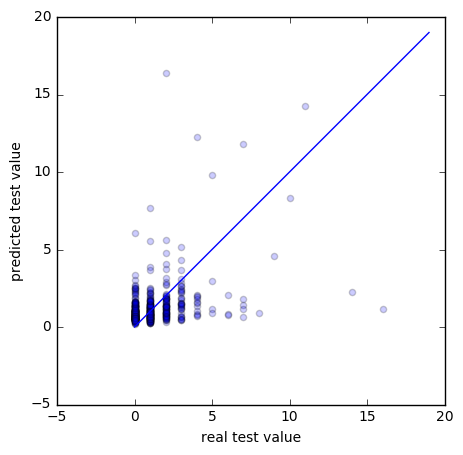

In [62]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred,alpha=0.2)
plt.xlabel('real test value')
plt.ylabel('predicted test value')
plt.plot(np.arange(0,20),np.arange(0,20))

### Extra Trees 

In [59]:
from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor,
                              AdaBoostRegressor)

In [63]:
et = RandomForestRegressor(n_estimators=100)
et.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [64]:
y_trainpred = rf.predict(x_train)
y_pred = rf.predict(x_test)

In [65]:
print("Train error",mean_squared_error(y_train,y_trainpred))
print("Test error",mean_squared_error(y_test,y_pred))

Train error 0.587340357073
Test error 2.99659929453


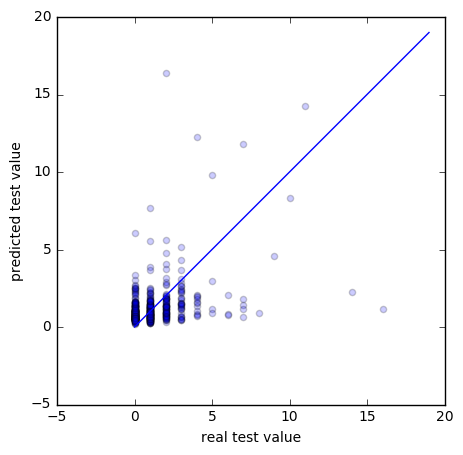

In [66]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred,alpha=0.2)
plt.xlabel('real test value')
plt.ylabel('predicted test value')
plt.plot(np.arange(0,20),np.arange(0,20))

### AdaBoost 

In [68]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [69]:
y_trainpred = rf.predict(x_train)
y_pred = rf.predict(x_test)

In [70]:
print("Train error",mean_squared_error(y_train,y_trainpred))
print("Test error",mean_squared_error(y_test,y_pred))

Train error 0.587340357073
Test error 2.99659929453


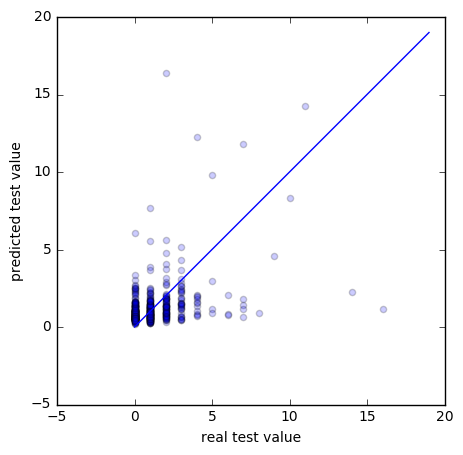

In [71]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred,alpha=0.2)
plt.xlabel('real test value')
plt.ylabel('predicted test value')
plt.plot(np.arange(0,20),np.arange(0,20))